In [69]:
import sys

import pandas as pd
import numpy as np
df = pd.read_excel("Data/S1%20File.xlsx")
#Rimozione colonne inutili e valori nulli
df.drop(columns=["Average weekday", "Average weekend day"], inplace=True)
df.dropna(inplace=True)

#Lista ordine delle colonne
columns_order = df.columns

#Cambio del valore in Genere 1:Maschio 0:Femmina
df["Gender"] = np.where(df["Gender"] == 2, 1,0)

#Normalizzazione
gender = df["Gender"]
id_no = df["ID No"]
df.drop(columns=["Gender", "ID No"], inplace=True)

df = (df - df.mean())/df.std()
df["Gender"] = gender
#df["ID No"] = id_no

#df = df[columns_order]
df.reset_index(drop=True, inplace=True)

In [97]:
from random import sample, seed
#random forest per livello ansia, senza depressione.
y_depression = df["Total Depression score"]
df_smaller = df.drop(columns=["Total anxiety score", "Total Depression score"], inplace = False)

seed(33)

test_idx_depression = sample(range(0,df_smaller.shape[0]),20)
test_depression = df_smaller.iloc[test_idx_depression]
df_smaller.drop(df_smaller.index[test_idx_depression], inplace=True)
#drop test from the training

training_idx_depression = sample(range(0,df_smaller.shape[0]),25)
training_depression = df_smaller.iloc[training_idx_depression]
df_smaller.drop(df_smaller.index[training_idx_depression], inplace=True)

validation_idx_depression = sample(range(0,df_smaller.shape[0]),20)
validation_depression = df_smaller.iloc[validation_idx_depression]

#y_depression.iloc[training_idx_depression]
#training_depression
#validation_depression
#test_depression

,Age,Height (m),Weight (kgs),BMI,working hours per week,RP,RE,BP,MH,VT,...,Time standing (h),Time stepping (h),Step count,Sit to stand transitions,Sitting only.1,Time standing (h).1,Time stepping (h).1,Step count.1,Sit to stand transitions.1,Gender
63,0.455007,1.395743,1.776883,0.592587,0.180008,0.430939,0.298681,-0.759624,1.192380,0.474568,...,-0.527279,1.902801,2.602256,-0.440454,2.068476,-0.761733,0.043624,0.641914,-0.056801,0
60,-1.414705,1.322320,1.507029,0.856802,0.180008,0.430939,0.298681,0.574851,-0.405655,-0.927564,...,-1.082130,-0.737280,-0.653695,-1.120508,1.167586,-1.207910,-1.287030,-1.064856,-0.979825,1
4,-0.904784,-0.836788,0.653943,2.166780,0.402345,0.430939,0.298681,0.574851,1.192380,0.474568,...,-0.939225,-0.211143,-0.122643,-0.604605,-0.075599,-0.095062,2.982151,3.196950,0.641703,0
24,1.049915,-0.834096,1.263291,0.605222,1.152733,0.430939,0.298681,-2.094098,1.192380,0.474568,...,-0.346218,-0.438908,-0.416609,0.122350,0.646792,-1.685215,-2.094927,-1.954963,-1.129504,0
37,-0.904784,-0.836910,-1.261148,-0.398136,-0.375835,-2.517592,0.298681,-0.759624,0.393362,-2.329696,...,-1.458714,-0.958496,-0.776657,-0.241128,0.424195,-1.039296,-0.827637,-0.894267,0.018038,1
61,-0.649823,1.108172,1.010847,2.119164,0.735851,-2.517592,-1.858457,-2.094098,-0.405655,-2.329696,...,-0.583785,-1.099426,-1.258084,-0.757031,-0.167998,-0.613872,0.542619,0.387055,-0.904985,1
47,-0.054915,1.255016,0.775813,0.563230,0.735851,0.430939,0.298681,0.574851,0.393362,0.474568,...,2.212342,3.188250,2.682414,-0.686680,-1.547682,0.496381,0.336685,0.523116,-0.431000,0
45,-0.394862,1.089816,0.244810,1.267804,0.180008,-2.517592,-4.015595,-0.759624,-0.405655,-2.329696,...,1.045770,-0.275201,-0.128539,-1.085333,-1.665281,0.888083,1.936637,1.851255,-0.381107,1
3,0.030072,-0.836910,-1.087049,-0.153747,-1.265184,0.430939,0.298681,0.574851,-0.405655,0.474568,...,-0.064296,-0.080178,-0.122112,0.935288,0.825290,-1.236444,-1.738502,-1.653287,-0.605626,1
38,1.559837,1.268477,0.357975,0.005442,-0.042330,-1.043326,-1.858457,0.574851,-1.204672,-0.927564,...,-0.716847,-0.095837,0.381572,-0.276303,-0.892490,0.229194,0.590143,0.292543,0.042985,1


1.0551258917589172
0.996720233702337
0.8831077490774908
1.0095979089790896
0.970452398523985
0.9589450799507995
1.0418948339483394
1.0350942189421892
1.0021896678966786
1.0146172201722017
1.0130285977859772
0.957839360393604
0.9221469249692497
1.0174586715867158
0.9760977244772444
1.0377333948339484
0.944140590405904
0.9473578105781059
0.9976948339483395
1.0056083640836406
1.0656370233702337
1.0360264452644525
0.9828895448954491
0.9359552275522756
1.0258407134071337
0.975461316113161
0.9947222632226319


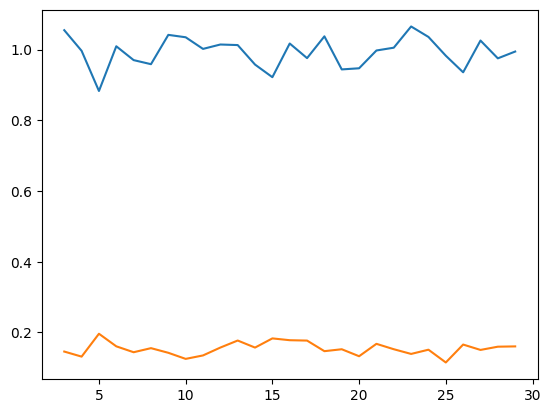

In [103]:
#crea la random forest per la depressione
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
#TODO fare il validation per parametri B ed MTRY, questa è solo una prova...
min_validation_error = sys.maxsize
min_model = None
#TODO aggiunti parametri list e max_depth, però stranamente la curva di validation error non è quella che ci si aspetta...
list_n_trees = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
max_depth = [int(x) for x in range(3,30)]
MSE_VAL_list = []
MES_TRAIN_list = []
for i in range(0,len(max_depth)):
        #TODO inserire poi i parametri. Per ora risultati anomali nel MSE
        rf = RandomForestRegressor()
        rf.fit(training_depression, y_depression.iloc[training_idx_depression])
        y_depression_validation = rf.predict(validation_depression)
        y_depression_training = rf.predict(training_depression)
        #calcolo training error
        MSE_TR = np.mean((y_depression.iloc[training_idx_depression]-y_depression_training)**2)
        MES_TRAIN_list.append(MSE_TR)
        #Calcolo del validation error...
        MSE_VAL = np.mean((y_depression.iloc[validation_idx_depression]-y_depression_validation)**2)
        print(MSE_VAL)
        MSE_VAL_list.append(MSE_VAL)
        if min_validation_error > MSE_VAL:
            min_model = rf
            min_validation_error = MSE_VAL

plt.plot(max_depth,MSE_VAL_list)
plt.plot(max_depth,MES_TRAIN_list)
plt.show()

In [66]:
from sklearn.ensemble import RandomForestRegressor 
from random import sample, seed
#random forest per livello depressione, senza ansia.
y_anxiety = df["Total anxiety score"]
df_anxiety = df.drop(columns=["Total anxiety score", "Total Depression score"], inplace = False)

seed(333)
#TODO riprendere il test set precedente


